# MATH 481A - Spring 2022
## Numerical Analysis

Your Name Here

<hr>

# Final Exam - Computing Problem: Runge-Kutta Schemes

<hr>

### Grading: This problem is worth 40 points out of a total of 140 points for the final exam

<hr>

Follow the directions below to compute the approximate solution to the first order ODE

<br>

$$ y' = f(t, y), \ \ \ y(0) = y_0,$$

using the four-stage, fourth-order Runge-Kutta scheme:

<br>
$$ \begin{split} \label{eq:rk4}
k_1 = & \, \Delta t f(t_n, y_n) \\[0.1in]
k_2 = & \, \Delta t f(t_n + \frac{\Delta t}{2}, y_n + \frac{k_1}{2}) \\[0.1in]
k_3 = & \, \Delta t f(t_n + \frac{\Delta t}{2}, y_n + \frac{k_2}{2}) \\[0.1in]
k_4 = & \, \Delta t f(t_n + \Delta t, y_n + k_3) \\[0.1in]
y_{n+1} = & \, y_n + \frac{1}{8} (k_1 + 3 k_2 + 3 k_3 + k_4).
\end{split} $$
<br> 

<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

<hr>

### Example

<hr>

Approximate the solution of the ODE

$$ y ' = 2t y, \ \ \ \ y(0) = 1, $$

up to $t = 2$ using the three stage (third order) Runge-Kutta scheme:

$$ \begin{split}
k_1 = & \, \Delta t f(t_n, y_n) \\[0.1in]
k_2 = & \, \Delta t f(t_n + \Delta t, y_n + k_1) \\[0.1in]
k_3 = & \, \Delta t f(t_n + \frac{\Delta t}{2}, y_n + \frac{k_1 + k_2}{4}) \\[0.1in]
y_{n+1} = & \, y_n + \frac{k_1}{6} + \frac{k_2}{6} + \frac{2 \, k_3}{3},
\end{split} $$

using $\Delta t = 0.05$ and display the numerical solution and the exact solution $y(t) = e^{t^2}$ in the same axis.

<br>
<hr>

In [2]:
# Function definition

def f2(t,y):
    return 2.0*t*y

In [3]:
# Function definition of for the RK scheme

def RK3(f, t0, tf, y0, dt):

    t = np.arange(t0, tf + dt, dt)

    K = len(t)
    y = np.zeros(t.shape)
    y[0] = y0

    T = 0.0
    t_final = tf

    k = 0
    while T < t_final and k < K-1:
        k1 = dt*f(t[k], y[k])
        k2 = dt*f(t[k] + 0.5*dt, y[k] + k1)
        k3 = dt*f(t[k] + 0.5*dt, y[k] + 0.25*(k1 + k2))
        y[k+1] = y[k] + (1.0/6.0)*(k1 + k2 + 4.0*k3)
        k += 1
        T += dt

    return t, y

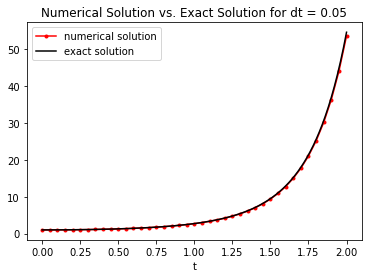

In [11]:
dt = 0.05
tRK1, yRK1 = RK3(f2, 0.0, 2.0, 1.0, dt)
tExact = np.linspace(0.0, 2.0, 201)
yExact = np.exp(tExact**2)
plt.plot(tRK1, yRK1, '.-r', label = 'numerical solution')
plt.plot(tExact, yExact, 'k', label = 'exact solution')
plt.xlabel('t')
plt.title('Numerical Solution vs. Exact Solution for dt = %.2f' %dt)
plt.legend()

### Problem #1. 

Write a Python function named <tt>f(t,y)</tt> that takes as input $t$ and $y$ and returns $f(t, y) = -2ty$.

In [23]:
def f(t,y):     #referenced above
    return -2*t*y


### Problem #2

Write a function name <tt>RK4(f, t0, tf, y0, dt)</tt> that takes as input:
<br>

1. <tt>f</tt> - the name of the funtion defining the right hand side of the ODE.
<br>
1. <tt>t0</tt> - initial time,
<br>
1. <tt>tf</tt> - final time, and
<br>
1. <tt>y0</tt> - initial conditions $y_0 = y(t_0)$.

And retunrs as output two 1D numpy arrays:

1. <tt>t</tt> - holding the values $t_k$ at which the solution was approximated, and
<br>
1. <tt>y</tt> - holding the approximate values of the solution $y_k \approx y(t_k)$ computed with the four-stage Runge-Kutta scheme above.



In [28]:
def RK4(f, t0, tf, y0, dt): #referenced above
    t = np.arange(t0, tf + dt, dt)

    K = len(t)
    y = np.zeros(t.shape)
    y[0] = y0

    T = 0.0
    t_final = tf

    k = 0

    while T < t_final and K < K-1:
        k1 = dt*f(t[k], y[k])
        k2 = dt*f(t[k] + (dt/2), y[k] + (k1/2))
        k3 = dt*f(t[k] + (dt/2), y[k] + (k2/2))
        k4 = dt*f(t[k] + dt, y[k] + k3)
        y[k+1] = y[k] + (1.0/8.0) * (k1 + (3.0*k2) + (3.0*k3) + k4)
        k += 1
        T += dt
    return t, y

<hr>

### Problem #3

Use the functions you wrote in problems #1 and #2 to approximate the solution of the first order ODE

<br>
$$ y' = -2ty, \ \ \ y(0) = 1,$$

up to $t = 2$ using the four-stage Runge-Kutta scheme above and $\Delta t = 0.1, 0.05, 0.01$. Plot your numerical sulutions and the exact solution $y = e^{-t^2}$ in the same axis.

<hr>

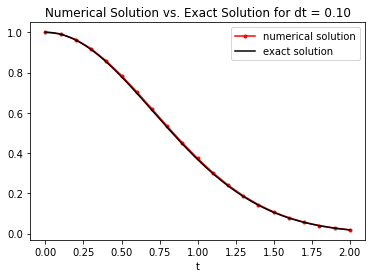

In [30]:
#referenced above
dt = 0.1
tRK1, yRK1 = RK3(f, 0.0, 2.0, 1.0, dt)
tExact = np.linspace(0.0, 2.0, 201)
yExact = np.exp(-tExact**2)
plt.plot(tRK1, yRK1, '.-r', label = 'numerical solution')
plt.plot(tExact, yExact, 'k', label = 'exact solution')
plt.xlabel('t')
plt.title('Numerical Solution vs. Exact Solution for dt = %.2f' %dt)
plt.legend()


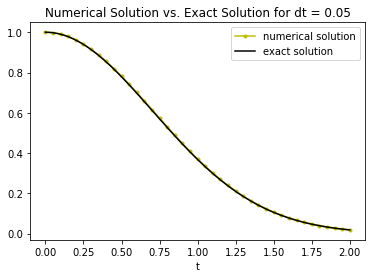

In [31]:
#referenced above
dt = 0.05
tRK1, yRK1 = RK3(f, 0.0, 2.0, 1.0, dt)
tExact = np.linspace(0.0, 2.0, 201)
yExact = np.exp(-tExact**2)
plt.plot(tRK1, yRK1, '.-y', label = 'numerical solution')
plt.plot(tExact, yExact, 'k', label = 'exact solution')
plt.xlabel('t')
plt.title('Numerical Solution vs. Exact Solution for dt = %.2f' %dt)
plt.legend()

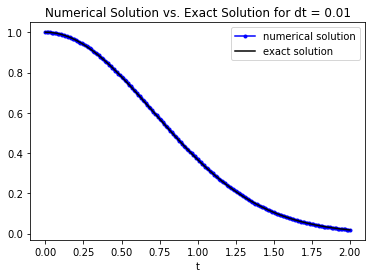

In [32]:
#referenced above
dt = 0.01
tRK1, yRK1 = RK3(f, 0.0, 2.0, 1.0, dt)
tExact = np.linspace(0.0, 2.0, 201)
yExact = np.exp(-tExact**2)
plt.plot(tRK1, yRK1, '.-b', label = 'numerical solution')
plt.plot(tExact, yExact, 'k', label = 'exact solution')
plt.xlabel('t')
plt.title('Numerical Solution vs. Exact Solution for dt = %.2f' %dt)
plt.legend()